### Visualizing letterboxd ratings for the report

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
# Load the data
data_filepath = './Data/augm_lboxd.csv'
letterboxd = pd.read_csv(data_filepath)
letterboxd

,user,title,rating,movie_id,date,minute,mean_rating,genre,country
0,144,Puss in Boots: The Last Wish,4.5,66829,2022.0,103.0,4.16,"['Comedy', 'Action', 'Adventure', 'Family', 'A...",['USA']
1,144,The Guardians of the Galaxy Holiday Special,4.0,87522,2022.0,45.0,3.25,"['Comedy', 'Adventure', 'Science Fiction']",['USA']
2,144,Dinosaur Hotel 2,2.0,25219,2022.0,80.0,NaN,['Horror'],['UK']
3,144,Strange World,2.5,77851,2022.0,102.0,2.84,"['Science Fiction', 'Animation', 'Adventure', ...",['USA']
4,144,Zen - Grogu and Dust Bunnies,3.0,108598,2022.0,3.0,3.11,"['Fantasy', 'Animation', 'Science Fiction']","['Japan', 'USA']"
...,...,...,...,...,...,...,...,...,...
1433485,290,Newark Athlete,0.0,58824,1891.0,1.0,2.62,['Documentary'],['USA']
1433486,290,Roundhay Garden Scene,0.0,70149,1888.0,1.0,3.27,['Documentary'],['UK']
1433487,290,Sallie Gardner at a Gallop,0.0,70959,1878.0,1.0,3.69,"['Documentary', 'Animation']",['USA']
1433488,290,This Land Is Mine,0.0,98758,1943.0,103.0,3.73,"['Drama', 'War']",['USA']


#### Checking for movies with missing augmentation
- We have many movies that are missing augmentation (mainly mean rating although not that important)
- This happened because:
    - Some movies don't have the same title as those in the database
    - Some movies are very little known (there are concerts and experimental movies here)

In [28]:
augm_columns = ['date', 'minute', 'mean_rating', 'genre', 'country']

def check_missing_augm(data, augm_columns):
    missings = {}
    for column in augm_columns:

        n_nans = sum(data[column].isna())
        missings[column] = n_nans
        #print(f'[{column}] column has [{n_nans}] missing values.')
    
    return missings

missings = check_missing_augm(letterboxd, augm_columns)
print(f'\n{missings}')


{'date': 18261, 'minute': 19628, 'mean_rating': 80364, 'genre': 17556, 'country': 17556}


### Plotting the distribution of counts of movies according to their number of ratings

#### Whole distribution

In [7]:
# Getting movie_counts
movie_counts = letterboxd['title'].value_counts()
movie_counts

title
Get Out                                                                    509
Parasite                                                                   508
Knives Out                                                                 507
Lady Bird                                                                  480
The Social Network                                                         479
                                                                          ... 
Iron Maiden: Rock am Ring 2014                                               1
Policewoman                                                                  1
Bouvetøya: The Last Place on Earth                                           1
BABYMETAL - Live at Budokan: Black Night Apocalypse - Kuroi Yoru Legend      1
Heavy Heads                                                                  1
Name: count, Length: 108275, dtype: int64

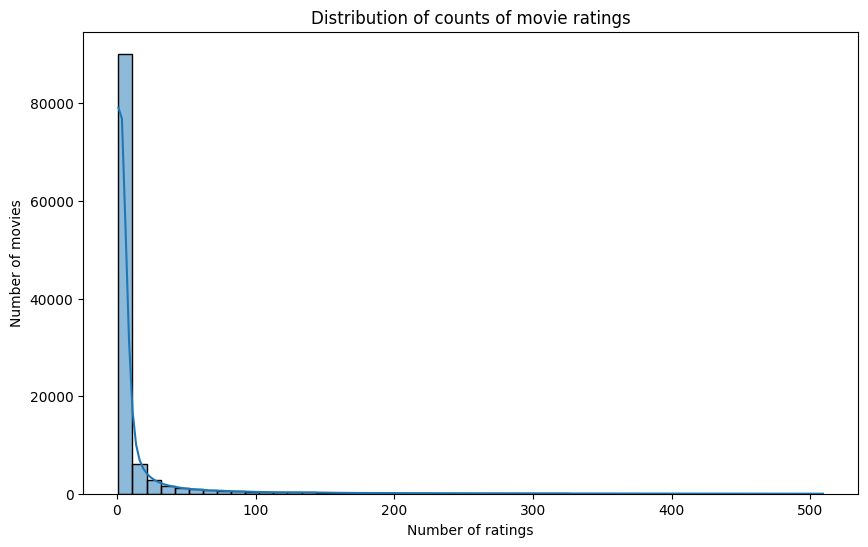

In [8]:
# Plot the entire distribution of counts of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(movie_counts, bins=50, kde=True)
plt.title("Distribution of counts of movie ratings")

plt.xlabel("Number of ratings")
plt.ylabel("Number of movies")
plt.show()

#### Only the most relevant range

In [9]:
# Plot the distribution of counts of movie ratings (meaning how many times each movie was actually rated)
# Need to get the movie counts and then plot the distribution

# Calculate the Interquartile range (IQR)
Q1 = movie_counts.quantile(0.25)
Q3 = movie_counts.quantile(0.75)
IQR = Q3 - Q1

# Define the range for the x-axis
x_min = max(0, Q1 - 1.5 * IQR) # The lower bound is 0 or Q1 - 1.5*IQR, whichever is higher
x_max = Q3 + 1.5 * IQR # The upper bound is Q3 + 1.5*IQR

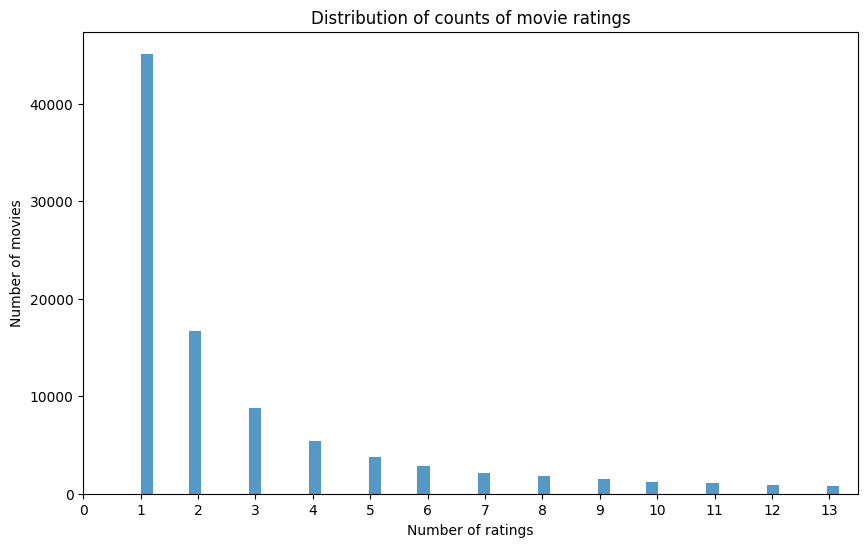

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(movie_counts)
plt.title("Distribution of counts of movie ratings")
plt.xlabel("Number of ratings")
plt.ylabel("Number of movies")
plt.xlim(x_min, x_max) # Set the limits for the x-axis
# Generate a list of x-axis tick locations and set them
x_ticks = np.arange(int(x_min), int(x_max) + 1)
plt.xticks(x_ticks)
plt.show()

In [11]:
# Print the number of movies with one rating vs the number of movies with more than one rating
print("Number of movies with one rating: ", sum(movie_counts == 1))
print("Number of movies with more than one rating: ", sum(movie_counts > 1))

Number of movies with one rating:  45105
Number of movies with more than one rating:  63170


In [12]:
# Print the maximum number of movie ratings vs the minimum number of movie ratings
print("Maximum number of movie ratings: ", max(movie_counts))
print("Minimum number of movie ratings: ", min(movie_counts))

Maximum number of movie ratings:  509
Minimum number of movie ratings:  1


### Plotting percentage of movies with one rating vs movies with more than one rating

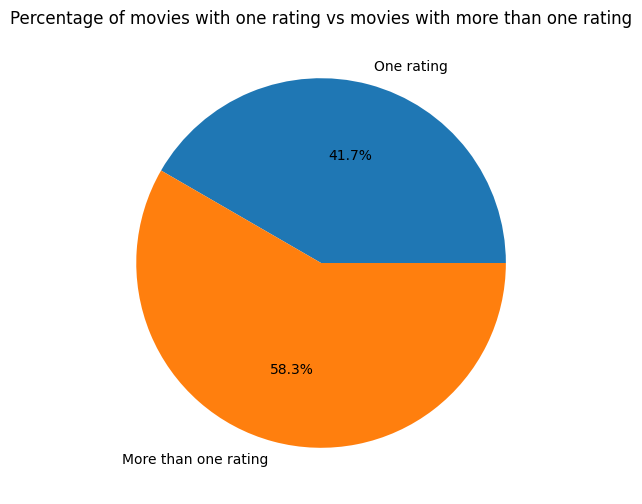

In [13]:
# Plot how much the movies with one rating influence the total number of ratings
# Calculate the percentage of ratings that come from movies with one rating
one_rating_movies = sum(movie_counts == 1)
more_than_one_rating_movies = sum(movie_counts > 1)
total_movies = one_rating_movies + more_than_one_rating_movies
one_rating_movies_percentage = one_rating_movies / total_movies * 100
more_than_one_rating_movies_percentage = more_than_one_rating_movies / total_movies * 100

plt.figure(figsize=(6, 6))
plt.pie([one_rating_movies_percentage, more_than_one_rating_movies_percentage], labels=["One rating", "More than one rating"], autopct='%1.1f%%')
plt.title("Percentage of movies with one rating vs movies with more than one rating")
plt.show()

### Plotting percentage of ratings coming from movies that only have one rating vs the others

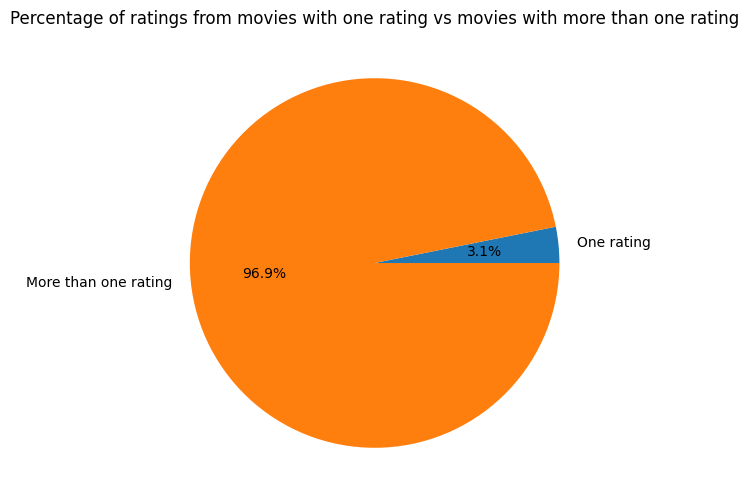

In [14]:
# From the entire number of ratings, plot how many ratings come from movies with one rating vs movies with more than one rating
one_rating_movies_ratings = sum(movie_counts[movie_counts == 1])
more_than_one_rating_movies_ratings = sum(movie_counts[movie_counts > 1])
total_ratings = one_rating_movies_ratings + more_than_one_rating_movies_ratings
one_rating_movies_ratings_percentage = one_rating_movies_ratings / total_ratings * 100
more_than_one_rating_movies_ratings_percentage = more_than_one_rating_movies_ratings / total_ratings * 100

plt.figure(figsize=(6, 6))
plt.pie([one_rating_movies_ratings_percentage, more_than_one_rating_movies_ratings_percentage], labels=["One rating", "More than one rating"], autopct='%1.1f%%')
plt.title("Percentage of ratings from movies with one rating vs movies with more than one rating")
plt.show()

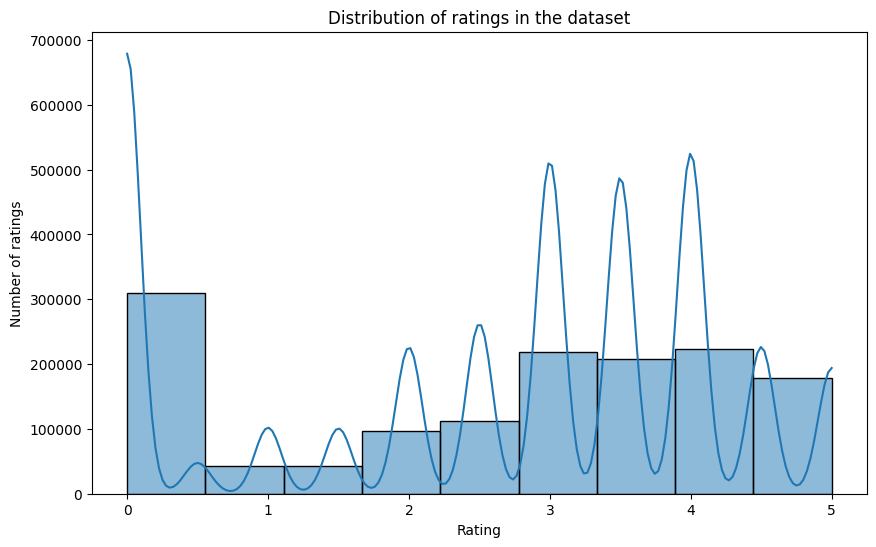

In [15]:
# Plot the distribution of ratings in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(letterboxd['rating'], bins=9, kde=True)
plt.title("Distribution of ratings in the dataset")
plt.xlabel("Rating")
plt.ylabel("Number of ratings")
plt.show()

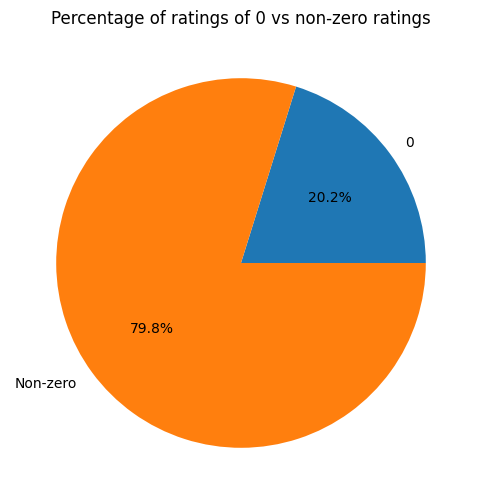

In [16]:
# Plot the percentage of ratings of 0 against the rest of the ratings
zero_ratings = sum(letterboxd['rating'] == 0)
non_zero_ratings = sum(letterboxd['rating'] != 0)
total_ratings = zero_ratings + non_zero_ratings
zero_ratings_percentage = zero_ratings / total_ratings * 100
non_zero_ratings_percentage = non_zero_ratings / total_ratings * 100

plt.figure(figsize=(6, 6))
plt.pie([zero_ratings_percentage, non_zero_ratings_percentage], labels=["0", "Non-zero"], autopct='%1.1f%%')
plt.title("Percentage of ratings of 0 vs non-zero ratings") # 0 ratings don't exist in letterboxd and most likely mean movies that were watched by the user but not rated
plt.show()

### Removing movies from dataset depending on their number of ratings
- In order to get smaller samples of the dataset while keeping some of the structure of the original data.
- Also allows us to get less disconnected subgraphs

In [17]:
one_rating_movies_ratings = sum(movie_counts[movie_counts == 1])
more_than_one_rating_movies_ratings = sum(movie_counts[movie_counts > 1])
total_ratings = one_rating_movies_ratings + more_than_one_rating_movies_ratings
one_rating_movies_ratings_percentage = one_rating_movies_ratings / total_ratings * 100
more_than_one_rating_movies_ratings_percentage = more_than_one_rating_movies_ratings / total_ratings * 100

In [29]:
sampled_dataframes = {}
dataframe_info = {}
movie_counts = letterboxd['title'].value_counts()
movie_range = range(0, 401, 10)

# For loop that goes from 0 to 401 and adds a dataframe to the sampled_dataframes dictionary that has removed the movies with the corresponding number of ratings
for i in movie_range:
    # Make a list of movies to keep and then filter the dataframe
    movies_to_keep = movie_counts[movie_counts > i].index
    sampled_lboxd = letterboxd[letterboxd['title'].isin(movies_to_keep)]
    sampled_dataframes[i] = sampled_lboxd
    
    # Print and store the number of movies in the sampled dataframe
    dataframe_info[i] = {}
    print("Dataframe with movies that have more than", i, "ratings")
    num_movies = len(sampled_dataframes[i]['title'].unique())
    dataframe_info[i]['num_movies'] = num_movies
    print("\tNumber of movies: ", num_movies)
    
    # Print and store the number of users in the sampled dataframe
    num_users = len(sampled_dataframes[i]['user'].unique())
    dataframe_info[i]['num_users'] = num_users
    print("\tNumber of users: ", num_users)
    
    # Print and store the number of ratings in the sampled dataframe
    num_ratings = len(sampled_dataframes[i])
    dataframe_info[i]['num_ratings'] = num_ratings
    print("\tNumber of ratings: ", num_ratings)

    # Storing the missing augmented values
    missings = check_missing_augm(sampled_lboxd, augm_columns)
    dataframe_info[i]['miss_augm'] = missings
    
    # Print and store the percentage of ratings that come from movies with more than i ratings and less or equal to i ratings
    more_than_i_rating_movies_ratings = sum(movie_counts[movie_counts > i])
    less_or_equal_to_i_rating_movies_ratings = sum(movie_counts[movie_counts <= i])
    total_ratings = more_than_i_rating_movies_ratings + less_or_equal_to_i_rating_movies_ratings
    more_than_i_rating_movies_ratings_percentage = round(more_than_i_rating_movies_ratings / total_ratings * 100, 2)
    less_or_equal_to_i_rating_movies_ratings_percentage = round(less_or_equal_to_i_rating_movies_ratings / total_ratings * 100, 2)
    
    dataframe_info[i]['more_than_i_rating_movies_ratings_percentage'] = more_than_i_rating_movies_ratings_percentage
    print("\tPercentage of ratings from movies with more than", i, "ratings: ", more_than_i_rating_movies_ratings_percentage)
    dataframe_info[i]['less_or_equal_to_i_rating_movies_ratings_percentage'] = less_or_equal_to_i_rating_movies_ratings_percentage
    print("\tPercentage of ratings from movies with less or equal to", i, "ratings: ", less_or_equal_to_i_rating_movies_ratings_percentage)
    print()

Dataframe with movies that have more than 0 ratings
	Number of movies:  108275
	Number of users:  557
	Number of ratings:  1433490
	Percentage of ratings from movies with more than 0 ratings:  100.0
	Percentage of ratings from movies with less or equal to 0 ratings:  0.0

Dataframe with movies that have more than 10 ratings
	Number of movies:  19190
	Number of users:  557
	Number of ratings:  1216907
	Percentage of ratings from movies with more than 10 ratings:  84.89
	Percentage of ratings from movies with less or equal to 10 ratings:  15.11

Dataframe with movies that have more than 20 ratings
	Number of movies:  12516
	Number of users:  557
	Number of ratings:  1119246
	Percentage of ratings from movies with more than 20 ratings:  78.08
	Percentage of ratings from movies with less or equal to 20 ratings:  21.92

Dataframe with movies that have more than 30 ratings
	Number of movies:  9524
	Number of users:  557
	Number of ratings:  1044542
	Percentage of ratings from movies with mor

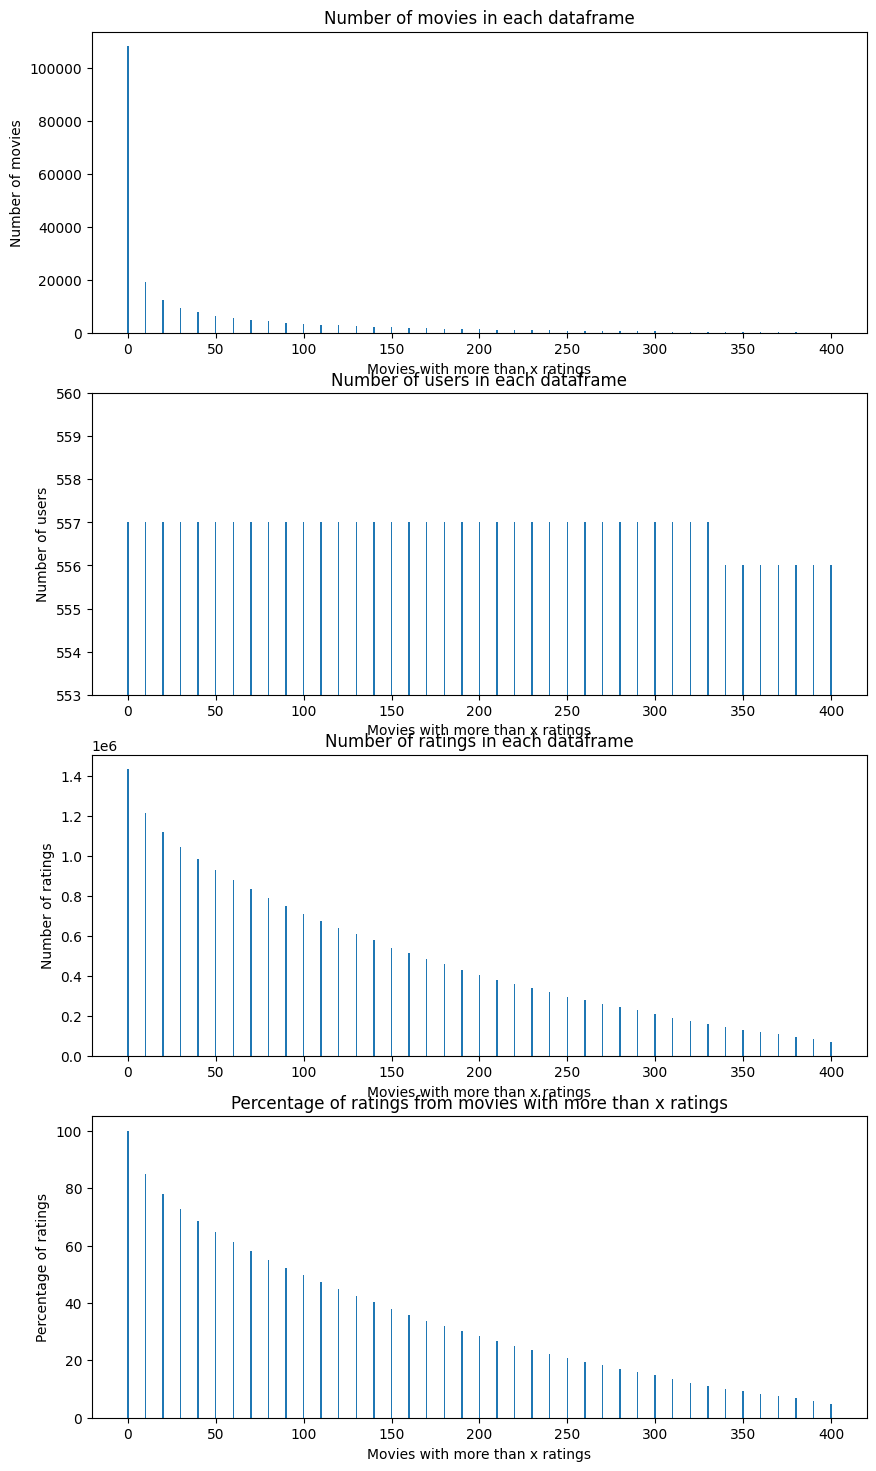

In [19]:
# Plot the number of movies, users and ratings for each dataframe in sampled_dataframes in different axes
fig, ax = plt.subplots(4, 1, figsize=(10, 18))
max_range = len(dataframe_info)+1

# Number of movies
num_movies = [dataframe_info[key]['num_movies'] for key in dataframe_info]
ax[0].bar(movie_range, num_movies)
ax[0].set_title("Number of movies in each dataframe")
ax[0].set_xlabel("Movies with more than x ratings")
ax[0].set_ylabel("Number of movies")

# Number of users
num_users = [dataframe_info[key]['num_users'] for key in dataframe_info]
ax[1].bar(movie_range, num_users)
# Restrict the y-axis around maximum and minimum values and ensure that the y-axis ticks are integers
ax[1].set_ylim(min(num_users) - 3, max(num_users) + 3)
ax[1].set_title("Number of users in each dataframe")
ax[1].set_xlabel("Movies with more than x ratings")
ax[1].set_ylabel("Number of users")

# Number of ratings
num_ratings = [dataframe_info[key]['num_ratings'] for key in dataframe_info]
ax[2].bar(movie_range, num_ratings)
ax[2].set_title("Number of ratings in each dataframe")
ax[2].set_xlabel("Movies with more than x ratings")
ax[2].set_ylabel("Number of ratings")

# Percentage of ratings from movies with more than x ratings
more_than_i_rating_movies_ratings_percentage = [dataframe_info[key]['more_than_i_rating_movies_ratings_percentage'] for key in dataframe_info]
ax[3].bar(movie_range, more_than_i_rating_movies_ratings_percentage)
ax[3].set_title("Percentage of ratings from movies with more than x ratings")
ax[3].set_xlabel("Movies with more than x ratings")
ax[3].set_ylabel("Percentage of ratings")
plt.show()

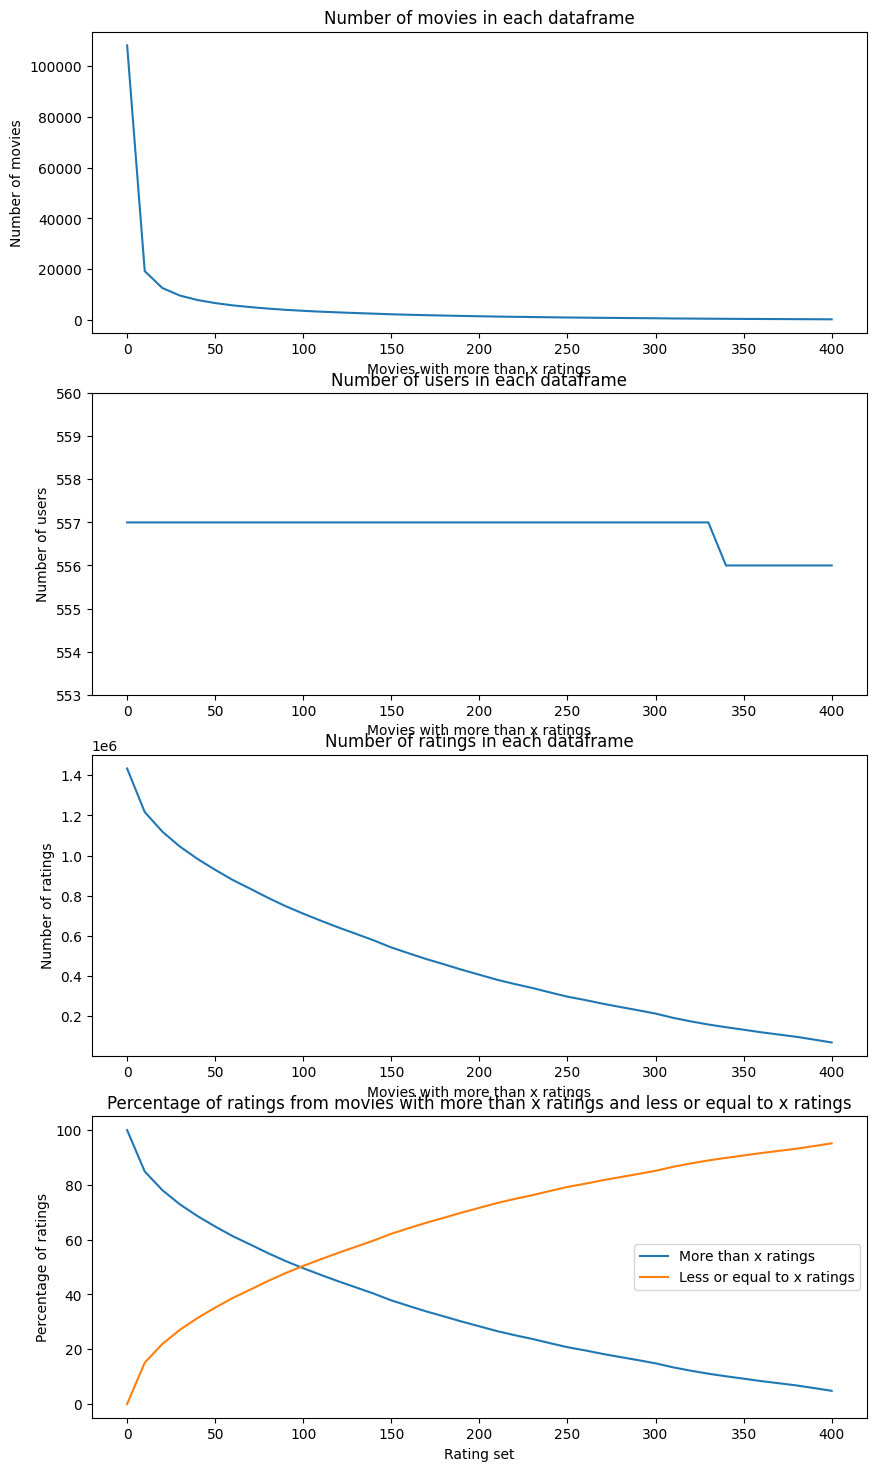

In [20]:
# Plot again but with lineplots this time
fig, ax = plt.subplots(4, 1, figsize=(10, 18))

# Number of movies
num_movies = [dataframe_info[key]['num_movies'] for key in dataframe_info]
ax[0].plot(movie_range, num_movies)
ax[0].set_title("Number of movies in each dataframe")
ax[0].set_xlabel("Movies with more than x ratings")
ax[0].set_ylabel("Number of movies")

# Number of users
num_users = [dataframe_info[key]['num_users'] for key in dataframe_info]
ax[1].plot(movie_range, num_users)
# Restrict the y-axis around maximum and minimum values and ensure that the y-axis ticks are integers
ax[1].set_ylim(min(num_users) - 3, max(num_users) + 3)
ax[1].set_title("Number of users in each dataframe")
ax[1].set_xlabel("Movies with more than x ratings")
ax[1].set_ylabel("Number of users")

# Number of ratings
num_ratings = [dataframe_info[key]['num_ratings'] for key in dataframe_info]
ax[2].plot(movie_range, num_ratings)
ax[2].set_title("Number of ratings in each dataframe")
ax[2].set_xlabel("Movies with more than x ratings")
ax[2].set_ylabel("Number of ratings")

# Percentage of ratings from movies with more than x ratings and less or equal to x ratings
more_than_i_rating_movies_ratings_percentage = [dataframe_info[key]['more_than_i_rating_movies_ratings_percentage'] for key in dataframe_info]
less_or_equal_to_i_rating_movies_ratings_percentage = [dataframe_info[key]['less_or_equal_to_i_rating_movies_ratings_percentage'] for key in dataframe_info]
ax[3].plot(movie_range, more_than_i_rating_movies_ratings_percentage, label="More than x ratings")
ax[3].plot(movie_range, less_or_equal_to_i_rating_movies_ratings_percentage, label="Less or equal to x ratings")
ax[3].set_title("Percentage of ratings from movies with more than x ratings and less or equal to x ratings")
ax[3].set_xlabel("Rating set")
ax[3].set_ylabel("Percentage of ratings")
ax[3].legend()
plt.show()

#### Preparing sampled datasets
- Movies with more than 100, 200, 300, 400 ratings
- Also checking how the missing augmentation varies across these sampled datasets

In [24]:
movies_100 = sampled_dataframes[100]
print('Only movies with more than 100 ratings:')
check_missing_augm(movies_100)
print('------\n')

movies_200 = sampled_dataframes[200]
print('Only movies with more than 200 ratings:')
check_missing_augm(movies_200)
print('------\n')

movies_300 = sampled_dataframes[300]
print('Only movies with more than 300 ratings:')
check_missing_augm(movies_300)
print('------\n')

movies_400 = sampled_dataframes[400]
print('Only movies with more than 400 ratings:')
check_missing_augm(movies_400)

Only movies with more than 100 ratings:
[user] column has [0] missing values.
[title] column has [0] missing values.
[rating] column has [0] missing values.
[movie_id] column has [0] missing values.
[date] column has [6333] missing values.
[minute] column has [6333] missing values.
[mean_rating] column has [6333] missing values.
[genre] column has [6333] missing values.
[country] column has [6333] missing values.
------

Only movies with more than 200 ratings:
[user] column has [0] missing values.
[title] column has [0] missing values.
[rating] column has [0] missing values.
[movie_id] column has [0] missing values.
[date] column has [4708] missing values.
[minute] column has [4708] missing values.
[mean_rating] column has [4708] missing values.
[genre] column has [4708] missing values.
[country] column has [4708] missing values.
------

Only movies with more than 300 ratings:
[user] column has [0] missing values.
[title] column has [0] missing values.
[rating] column has [0] missing v

In [28]:
movies_100.to_csv('augm_movies100.csv', index=False)

In [29]:
movies_200.to_csv('augm_movies200.csv', index=False)

In [30]:
movies_300.to_csv('augm_movies300.csv', index=False)

In [31]:
movies_400.to_csv('augm_movies400.csv', index=False)